In [1]:
# Import dependencies
import sqlite3
import pandas as pd
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy import text


In [2]:
# Create the SQLite database
# Read the CSV file into a Pandas dataframe
csv_file = 'rhfspuf2021_v1_1 (1).csv'
df = pd.read_csv(csv_file)
df.head()

,NUMUNITS_R,OUTCOME,SAMPSTRATA,ACCEPT,ADAGENCY,ADAGENT,ADNEWSPAPER,ADONLINE,ADOTHONLINE,ADVERTISE,...,YRNEWBLG_R,YRPROPACQ_R,YRMORT_R,OPTAX_R,APPVAL_R,CAPRATE_R,MORTAMT_R,OUTBAL_R,PMTAMT_R,LNCRDTAMT_R
0,24,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,6,-9,-9,-9,-8.0,-9,-9,-9,-9
1,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,7,-9,-9,-9,-8.0,-9,-9,-9,-9
2,8,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,-9,-9,-9,-9,-8.0,-9,-9,-9,-9
3,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9
4,15,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9


In [3]:
# Create an empty SQLite database and open a connection to it
sqlite_file = 'rhfs2021.sqlite'
conn = sqlite3.connect(sqlite_file)

In [4]:
# Write the data from the DataFrame to the SQLite Database using the opened connection
df.to_sql('rhfs', conn, index=False, if_exists='replace')

5210

In [5]:
# Close the connection (for now) and print a message that says this was all successful
conn.close()
print('CSV file has been successfully converted to SQLite database')

CSV file has been successfully converted to SQLite database


### Create a database_path and engine 

In [6]:
# Create a database path and an "engine" to allow SQL commands and connection management
# Pull everything out of the raw data table in the database to create a Pandas DataFrame to work with

import pandas as pd
from sqlalchemy import create_engine, text

# Create the Engine with the database
engine = create_engine('sqlite:///rhfs2021.sqlite')

# Establish a connection to the database
with engine.connect() as conn:
    # Define the SQL query as a text object
    sql_query = text("SELECT * FROM rhfs")
    
    # Execute the SQL query
    result = conn.execute(sql_query)
    
    # Fetch all rows from the result
    data = result.fetchall()

# Convert the result into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()


,NUMUNITS_R,OUTCOME,SAMPSTRATA,ACCEPT,ADAGENCY,ADAGENT,ADNEWSPAPER,ADONLINE,ADOTHONLINE,ADVERTISE,...,YRNEWBLG_R,YRPROPACQ_R,YRMORT_R,OPTAX_R,APPVAL_R,CAPRATE_R,MORTAMT_R,OUTBAL_R,PMTAMT_R,LNCRDTAMT_R
0,24,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,6,-9,-9,-9,-8.0,-9,-9,-9,-9
1,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,7,-9,-9,-9,-8.0,-9,-9,-9,-9
2,8,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,-9,-9,-9,-9,-8.0,-9,-9,-9,-9
3,12,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9
4,15,5,2,-9,-8,-8,-8,-8,-8,-9,...,-8,1,-9,-9,-9,-9.0,-9,-9,-9,-9


### Start transforming data to make it intelligible


In [7]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# See a list of the columns
display(df.columns)

Index(['NUMUNITS_R', 'OUTCOME', 'SAMPSTRATA', 'ACCEPT', 'ADAGENCY', 'ADAGENT',
       'ADNEWSPAPER', 'ADONLINE', 'ADOTHONLINE', 'ADVERTISE',
       ...
       'YRNEWBLG_R', 'YRPROPACQ_R', 'YRMORT_R', 'OPTAX_R', 'APPVAL_R',
       'CAPRATE_R', 'MORTAMT_R', 'OUTBAL_R', 'PMTAMT_R', 'LNCRDTAMT_R'],
      dtype='object', length=369)

In [8]:
# Add the weighting column for accuracy

df['weighted_result'] = df['NUMUNITS_R'] * df['WEIGHT']
df['weighted_result'].head()

0     1183.097618
1     9065.113258
2      746.626760
3      808.333800
4    15299.180343
Name: weighted_result, dtype: float64

In [9]:
# From the main df, select the relevant RENT and UTILITIES / AMENITIES columns and put them in their own dataframe

# First select the RENT columns
rent_columns = df.loc[:, df.columns.str.startswith('RENT')]

# Pull in the WEIGHT column to make sure we can apply it as necessary
rent_columns['WEIGHT'] = df['WEIGHT']

# Pull in the weighted_result columns for the same reason
rent_columns['weighted_result'] = df['weighted_result']

# Pull in the NUMUNITS_R in case we need to use it
rent_columns['NUMUNITS_R'] = df['NUMUNITS_R']

# Quick visual check on the dataframe I created
rent_columns.head()


/var/folders/k1/p7f99z1557z1twq8wpyj8m0r0000gn/T/ipykernel_93927/1487661134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_columns['WEIGHT'] = df['WEIGHT']
/var/folders/k1/p7f99z1557z1twq8wpyj8m0r0000gn/T/ipykernel_93927/1487661134.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_columns['weighted_result'] = df['weighted_result']
/var/folders/k1/p7f99z1557z1twq8wpyj8m0r0000gn/T/ipykernel_93927/1487661134.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,RENT,RENT1099_R,RENT1249_R,RENT1499_R,RENT1999_R,RENT2499_R,RENT274_R,RENT299_R,RENT2999_R,RENT349_R,RENT3499_R,RENT399_R,RENT3999_R,RENT449_R,RENT4499_R,RENT499_R,RENT4999_R,RENT5000_R,RENT549_R,RENT599_R,RENT649_R,RENT699_R,RENT749_R,RENT799_R,RENT899_R,RENT999_R,RENTLT249_R,RENTNO_R,WEIGHT,weighted_result,NUMUNITS_R
0,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,49.295734,1183.097618,24
1,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,4,6,2,-8,-8,-8,-8,-8,-8,755.426105,9065.113258,12
2,-9,-8,-8,8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,93.328345,746.626760,8
3,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,12,-8,-8,-8,-8,67.361150,808.333800,12
4,-9,2,1,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,2,10,-8,-8,-8,1019.945356,15299.180343,15


In [10]:
# Reorder the columns in the rent_columns DataFrame
rent_columns = rent_columns[[
    'RENT',
    'RENTNO_R',
    'RENTLT249_R',
    'RENT274_R',
    'RENT299_R',
    'RENT349_R', 
    'RENT399_R',
    'RENT449_R',
    'RENT499_R',
    'RENT549_R', 
    'RENT599_R',
    'RENT649_R', 
    'RENT699_R', 
    'RENT749_R', 
    'RENT799_R', 
    'RENT899_R',
    'RENT999_R',
    'RENT1099_R', 
    'RENT1249_R', 
    'RENT1499_R', 
    'RENT1999_R',
    'RENT2499_R',
    'RENT2999_R',
    'RENT3499_R', 
    'RENT3999_R', 
    'RENT4499_R', 
    'RENT4999_R', 
    'RENT5000_R',      
    'WEIGHT', 
    'weighted_result']]





In [11]:
# Rename the RENT columns

# Create a dictionary for the purpose of renaming

# To create the dictionary, first create a list for the keys
rent_keys = ['RENTNO_R',
    'RENTLT249_R',
    'RENT274_R',
    'RENT299_R',
    'RENT349_R', 
    'RENT399_R',
    'RENT449_R',
    'RENT499_R',
    'RENT549_R', 
    'RENT599_R',
    'RENT649_R', 
    'RENT699_R', 
    'RENT749_R', 
    'RENT799_R', 
    'RENT899_R',
    'RENT999_R',
    'RENT1099_R', 
    'RENT1249_R', 
    'RENT1499_R', 
    'RENT1999_R',
    'RENT2499_R',
    'RENT2999_R',
    'RENT3499_R', 
    'RENT3999_R', 
    'RENT4499_R', 
    'RENT4999_R', 
    'RENT5000_R']

# Then create a list of the values
rent_values = ['0','249','274','299','349','399','449','499','549','599','649','699','749','799','899','999','1099','1249','1499','1999','2499','2999','3499','3999','4499','4999','5000']



In [12]:
# Use a list comprehension to make the values into string ranges 
updated_rent_values = [f"{int(rent_values[i - 1]) + 1}-{rent_values[i]}" for i in range(1, len(rent_values))]
updated_rent_values.insert(0,'0')
updated_rent_values[len(updated_rent_values)-1] = '5000+'
updated_rent_values



['0',
 '1-249',
 '250-274',
 '275-299',
 '300-349',
 '350-399',
 '400-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799',
 '800-899',
 '900-999',
 '1000-1099',
 '1100-1249',
 '1250-1499',
 '1500-1999',
 '2000-2499',
 '2500-2999',
 '3000-3499',
 '3500-3999',
 '4000-4499',
 '4500-4999',
 '5000+']

In [13]:
# Use zip method and a dictionary comprehension to create a single dictionary from these two lists
rent_dict = {key: value for key, value in zip(rent_keys, updated_rent_values)}

# Check the dictionary that has been created to be sure it works
rent_dict

{'RENTNO_R': '0',
 'RENTLT249_R': '1-249',
 'RENT274_R': '250-274',
 'RENT299_R': '275-299',
 'RENT349_R': '300-349',
 'RENT399_R': '350-399',
 'RENT449_R': '400-449',
 'RENT499_R': '450-499',
 'RENT549_R': '500-549',
 'RENT599_R': '550-599',
 'RENT649_R': '600-649',
 'RENT699_R': '650-699',
 'RENT749_R': '700-749',
 'RENT799_R': '750-799',
 'RENT899_R': '800-899',
 'RENT999_R': '900-999',
 'RENT1099_R': '1000-1099',
 'RENT1249_R': '1100-1249',
 'RENT1499_R': '1250-1499',
 'RENT1999_R': '1500-1999',
 'RENT2499_R': '2000-2499',
 'RENT2999_R': '2500-2999',
 'RENT3499_R': '3000-3499',
 'RENT3999_R': '3500-3999',
 'RENT4499_R': '4000-4499',
 'RENT4999_R': '4500-4999',
 'RENT5000_R': '5000+'}

In [14]:
# Use this dictionary to rename the columns
rent_columns.rename(columns = rent_dict, inplace=True)

# Check that the column renaming worked as expected
rent_columns.head()

,RENT,0,1-249,250-274,275-299,300-349,350-399,400-449,450-499,500-549,550-599,600-649,650-699,700-749,750-799,800-899,900-999,1000-1099,1100-1249,1250-1499,1500-1999,2000-2499,2500-2999,3000-3499,3500-3999,4000-4499,4500-4999,5000+,WEIGHT,weighted_result
0,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,49.295734,1183.097618
1,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,4,6,2,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,755.426105,9065.113258
2,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,8,-8,-8,-8,-8,-8,-8,-8,-8,93.328345,746.626760
3,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,12,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,67.361150,808.333800
4,-9,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,2,10,-8,2,1,-8,-8,-8,-8,-8,-8,-8,-8,-8,1019.945356,15299.180343


In [15]:
# Remove the "Not Applicable" and "No Answer" (-8 and -9) values from the dataset so they don't mess up the totals when applying the 'WEIGHT'

# Convert the column to string datatype
rent_columns = rent_columns.astype(str)

# Replace integer values
rent_columns_clean = rent_columns.replace({"-8": "0", "-9": "0"})

# Convert back to float datatype
rent_columns_clean = rent_columns_clean.astype(float)

# Take a look at the new dataframe
rent_columns_clean.head()


,RENT,0,1-249,250-274,275-299,300-349,350-399,400-449,450-499,500-549,550-599,600-649,650-699,700-749,750-799,800-899,900-999,1000-1099,1100-1249,1250-1499,1500-1999,2000-2499,2500-2999,3000-3499,3500-3999,4000-4499,4500-4999,5000+,WEIGHT,weighted_result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.295734,1183.097618
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.426105,9065.113258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.328345,746.626760
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.361150,808.333800
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1019.945356,15299.180343


In [16]:
# Now with those values removed and this dataframe ready to go, apply the weights

# Iterate through each RENT column in the dataframe to multiply it by the 'WEIGHT' value
for column in rent_columns_clean.columns:
    # Skip the columns I don't want to multiply by the weight
    if column in ['WEIGHT', 'weighted_result']:
        continue

    # Multiply each column by "WEIGHT" in place
    rent_columns_clean[column] *= rent_columns_clean['WEIGHT']

# Check dataframe
rent_columns_clean.head(10)

,RENT,0,1-249,250-274,275-299,300-349,350-399,400-449,450-499,500-549,550-599,600-649,650-699,700-749,750-799,800-899,900-999,1000-1099,1100-1249,1250-1499,1500-1999,2000-2499,2500-2999,3000-3499,3500-3999,4000-4499,4500-4999,5000+,WEIGHT,weighted_result
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.295734,1183.097618
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3021.704419,4532.556629,1510.85221,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.426105,9065.113258
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,746.62676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.328345,746.626760
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,808.333800,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.361150,808.333800
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,2039.890712,10199.453562,0.0,2039.890712,1019.945356,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1019.945356,15299.180343
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.467102,1319.072324
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.966846,1247.204310
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.152061,721.368553
8,0.0,0.0,0.0,952.027176,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.335598,952.027176
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.403691,2021.670132


In [17]:
# Combine several of the rent columns to get down to 10 rental price ranges in total

rent_columns_clean['<$500'] = rent_columns_clean['0'] + rent_columns_clean['1-249'] + rent_columns_clean['250-274'] + rent_columns_clean['275-299'] + rent_columns_clean['300-349'] + rent_columns_clean['350-399'] + rent_columns_clean['400-449'] + rent_columns_clean['450-499']
rent_columns_clean['<$500'].head(50)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8     952.027176
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
Name: <$500, dtype: float64

In [18]:
# Create additional new columns that group the rental market into 10 price bands total

rent_columns_clean['$500-999'] = rent_columns_clean.loc[ : , '500-549':'900-999'].sum(axis=1)
rent_columns_clean['$1000-1499'] = rent_columns_clean.loc[ : , '1000-1099':'1250-1499'].sum(axis=1)
rent_columns_clean['$1500-1999'] = rent_columns_clean['1500-1999']
rent_columns_clean['$2000-2499'] = rent_columns_clean['2000-2499']
rent_columns_clean['$2500-2999'] = rent_columns_clean['2500-2999']
rent_columns_clean['$3000-3499'] = rent_columns_clean['3000-3499']
rent_columns_clean['$3500-3999'] = rent_columns_clean['3500-3999']
rent_columns_clean['$4000-4499'] = rent_columns_clean['4000-4499']
rent_columns_clean['$4500-4999'] = rent_columns_clean['4500-4999']
rent_columns_clean['$5000+'] = rent_columns_clean['5000+']
rent_columns_clean.head()



,RENT,0,1-249,250-274,275-299,300-349,350-399,400-449,450-499,500-549,550-599,600-649,650-699,700-749,750-799,800-899,900-999,1000-1099,1100-1249,1250-1499,1500-1999,2000-2499,2500-2999,3000-3499,3500-3999,4000-4499,4500-4999,5000+,WEIGHT,weighted_result,<$500,$500-999,$1000-1499,$1500-1999,$2000-2499,$2500-2999,$3000-3499,$3500-3999,$4000-4499,$4500-4999,$5000+
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.295734,1183.097618,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3021.704419,4532.556629,1510.85221,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.426105,9065.113258,0.0,9065.113258,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,746.62676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.328345,746.626760,0.0,0.000000,746.626760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,808.333800,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.361150,808.333800,0.0,808.333800,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,2039.890712,10199.453562,0.0,2039.890712,1019.945356,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1019.945356,15299.180343,0.0,12239.344274,3059.836069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Transforming the Utilities Data

In [19]:
# Pulling out the Utilities columns in order to transform the data into something usable
utilities = ['IELEC', 'IGAS', 'IWATER', 'ISEWER', 'ICABLE', 'IWIFI', 'IPOOL', 'IPARKING']

utilities_only = df[utilities]

# Checking this new dataframe
utilities_only.tail(10)

,IELEC,IGAS,IWATER,ISEWER,ICABLE,IWIFI,IPOOL,IPARKING
5200,1,1,1,1,2,2,3,2
5201,2,2,2,2,2,2,1,1
5202,2,3,2,2,2,2,3,-9
5203,2,3,2,2,2,2,3,2
5204,1,1,1,1,2,2,3,-9
5205,2,3,1,1,2,2,3,-9
5206,2,3,2,2,2,2,1,-9
5207,2,3,1,1,2,2,3,1
5208,2,2,2,2,2,2,1,1
5209,2,2,2,2,2,2,1,1


In [20]:
# Translate the integer data into string responses for filtering results on later

# Convert the columns to string datatype
utilities_only = utilities_only.astype(str)

# Replace integer values as specified in dictionary below
utilities_only = utilities_only.replace({
    "1":"Included in rent", 
    "2":"Not included in rent",
    "3":"Not available",
    "-9": "Not reported"
    })

utilities_only.tail()

,IELEC,IGAS,IWATER,ISEWER,ICABLE,IWIFI,IPOOL,IPARKING
5205,Not included in rent,Not available,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Not reported
5206,Not included in rent,Not available,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Included in rent,Not reported
5207,Not included in rent,Not available,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Included in rent
5208,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Included in rent,Included in rent
5209,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Included in rent,Included in rent


In [22]:
# Pull these transformed utilities columns into the rent_columns_clean dataframe to look at both together
rent_columns_clean[['IELEC', 'IGAS', 'IWATER', 'ISEWER', 'ICABLE', 'IWIFI', 'IPOOL', 'IPARKING']] = utilities_only[['IELEC', 'IGAS', 'IWATER', 'ISEWER', 'ICABLE', 'IWIFI', 'IPOOL', 'IPARKING']]

# Look at the combined dataframe
rent_columns_clean.tail(10)

,RENT,0,1-249,250-274,275-299,300-349,350-399,400-449,450-499,500-549,550-599,600-649,650-699,700-749,750-799,800-899,900-999,1000-1099,1100-1249,1250-1499,1500-1999,2000-2499,2500-2999,3000-3499,3500-3999,4000-4499,4500-4999,5000+,WEIGHT,weighted_result,<$500,$500-999,$1000-1499,$1500-1999,$2000-2499,$2500-2999,$3000-3499,$3500-3999,$4000-4499,$4500-4999,$5000+,IELEC,IGAS,IWATER,ISEWER,ICABLE,IWIFI,IPOOL,IPARKING
5200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,872.802021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,24.937201,872.802021,0.0,872.802021,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Included in rent,Included in rent,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Not included in rent
5201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,199.737980,399.475959,51.545285,0.000000,0.0,0.0,0.0,0.0,0.0,3.221580,650.759224,0.0,0.000000,199.737980,399.475959,51.545285,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Included in rent,Included in rent
5202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,134.320556,223.867593,111.933797,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.596690,470.121945,0.0,0.000000,358.188149,111.933797,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not available,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not available,Not reported
5203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.271709,639.509818,3051.375417,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,18.271709,3709.156944,0.0,0.000000,657.781527,3051.375417,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not available,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Not available,Not included in rent
5204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,9565.660717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,869.605520,9565.660717,0.0,9565.660717,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Included in rent,Included in rent,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Not reported
5205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,930.578853,10236.367381,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not available,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Not reported
5206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,898.739205,0.000000,431.708789,0.0,0.0,0.0,0.0,0.0,3.924625,1334.372619,0.0,0.000000,0.000000,898.739205,0.000000,431.708789,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not available,Not included in rent,Not included in rent,Not included in rent,Not included in rent,Included in rent,Not reported
5207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1260.58195,1680.775934,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,52.524248,2941.357884,0.0,2941.357884,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in rent,Not available,Included in rent,Included in rent,Not included in rent,Not included in rent,Not available,Included in rent
5208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,3859.812086,5676.194245,3178.668777,8514.291367,11352.388489,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,113.523885,32694.878848,0.0,9536.006331,23045.348633,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Not included in re

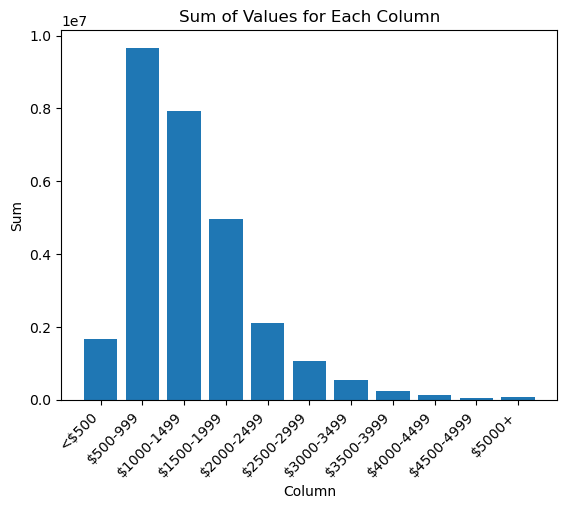

In [24]:
import matplotlib.pyplot as plt

# Sum the values of each column (excluding 'weight', 'weighted_result', and utilities columns)
column_sums = rent_columns_clean.loc[ : , '<$500':'$5000+'].sum()

# Plot a histogram of the column sums
plt.bar(column_sums.index, column_sums.values)
plt.xlabel('Column')
plt.ylabel('Sum')
plt.title('Sum of Values for Each Column')
plt.xticks(rotation=45, ha='right')
plt.show()



In [26]:
# Splitting everything into different datasets for comparison purposes
# Where ALL Utilities & Perqs are included
all_included_df = rent_columns_clean.loc[(rent_columns_clean['IELEC'] == 'Included in rent')
                                               & (rent_columns_clean['IGAS'] == 'Included in rent')
                                               & (rent_columns_clean['IWATER'] == 'Included in rent')
                                               & (rent_columns_clean['ISEWER'] == 'Included in rent')
                                               & (rent_columns_clean['ICABLE'] == 'Included in rent')
                                               & (rent_columns_clean['IWIFI'] == 'Included in rent')
                                               & (rent_columns_clean['IPOOL'] == 'Included in rent')
                                               & (rent_columns_clean['IPARKING'] == 'Included in rent')
                                               ]
all_excluded_df = rent_columns_clean.loc[(rent_columns_clean['IELEC'] == 'Not included in rent')
                                               & (rent_columns_clean['IGAS'] == 'Not included in rent')
                                               & (rent_columns_clean['IWATER'] == 'Not included in rent')
                                               & (rent_columns_clean['ISEWER'] == 'Not included in rent')
                                               & (rent_columns_clean['ICABLE'] == 'Not included in rent')
                                               & (rent_columns_clean['IWIFI'] == 'Not included in rent')
                                               & (rent_columns_clean['IPOOL'] == 'Not included in rent')
                                               & (rent_columns_clean['IPARKING'] == 'Not included in rent')
                                               ] 
len(all_excluded_df)

68

In [27]:
# All utilities included vs. excluded
utilities_included_df = rent_columns_clean.loc[(rent_columns_clean['IELEC'] == 'Included in rent')
                                               & (rent_columns_clean['IGAS'] == 'Included in rent')
                                               & (rent_columns_clean['IWATER'] == 'Included in rent')
                                               & (rent_columns_clean['ISEWER'] == 'Included in rent')
                                               ]
utilities_excluded_df = rent_columns_clean.loc[(rent_columns_clean['IELEC'] == 'Not included in rent')
                                               & (rent_columns_clean['IGAS'] == 'Not included in rent')
                                               & (rent_columns_clean['IWATER'] == 'Not included in rent')
                                               & (rent_columns_clean['ISEWER'] == 'Not included in rent')
                                               ] 




In [28]:
# Perqs included and excluded
perqs_included_df = rent_columns_clean.loc[(rent_columns_clean['ICABLE'] == 'Included in rent')
                                               & (rent_columns_clean['IWIFI'] == 'Included in rent')
                                               & (rent_columns_clean['IPOOL'] == 'Included in rent')
                                               & (rent_columns_clean['IPARKING'] == 'Included in rent')
                                               ]
perqs_excluded_df = rent_columns_clean.loc[(rent_columns_clean['ICABLE'] != 'Included in rent')
                                               & (rent_columns_clean['IWIFI'] != 'Included in rent')
                                               & (rent_columns_clean['IPOOL'] != 'Included in rent')
                                               & (rent_columns_clean['IPARKING'] != 'Included in rent')
                                               ] 

In [32]:
# From the DataFrames created, create datasets that can be used in a Javascript plot

# Utilities & Perqs (Amenities) datasets
all_incl_sums = all_included_df.loc[ : , '<$500':'$5000+'].sum() / 1000
all_excl_sums = all_excluded_df.loc[ : , '<$500':'$5000+'].sum()


# Utilities dataset
utilities_incl_sums = utilities_included_df.loc[ : , '<$500':'$5000+'].sum()
utilities_excl_sums = utilities_excluded_df.loc[ : , '<$500':'$5000+'].sum()

#Amenities datasets
perqs_incl_sums = perqs_included_df.loc[ : , '<$500':'$5000+'].sum()
perqs_excl_sums = perqs_excluded_df.loc[ : , '<$500':'$5000+'].sum()

In [33]:
# Turn datasets into a dictionary to prep for putting them into javascript arrays for use in interactive visualization
all_incl_dict = all_incl_sums.to_dict()
all_excl_dict = all_excl_sums.to_dict()
utilities_incl_dict = utilities_incl_sums.to_dict()
utilities_excl_dict = utilities_excl_sums.to_dict()
perqs_incl_dict = perqs_incl_sums.to_dict()
perqs_excl_dict = perqs_excl_sums.to_dict()
all_incl_dict



{'0': 1.0275620994804,
 '1-249': 0.0,
 '250-274': 0.0,
 '275-299': 0.0,
 '300-349': 0.0,
 '350-399': 0.0,
 '400-449': 0.0,
 '450-499': 0.0,
 '500-549': 0.0,
 '550-599': 3.2555747974,
 '600-649': 0.0,
 '650-699': 8.80363748433,
 '700-749': 0.0,
 '750-799': 12.667104294000001,
 '800-899': 0.8233306232331,
 '900-999': 1.3613792968375,
 '1000-1099': 0.0,
 '1100-1249': 0.0,
 '1250-1499': 5.354100638112,
 '1500-1999': 19.0803138811833,
 '2000-2499': 0.9341768547,
 '2500-2999': 0.9731232019250001,
 '3000-3499': 9.398601143518999,
 '3500-3999': 22.455020636045,
 '4000-4499': 32.206040624094,
 '4500-4999': 0.113323571385,
 '5000+': 1.4005371622743,
 '<$500': 1.0275620994804,
 '$500-999': 26.911026495800602,
 '$1000-1499': 5.354100638112}

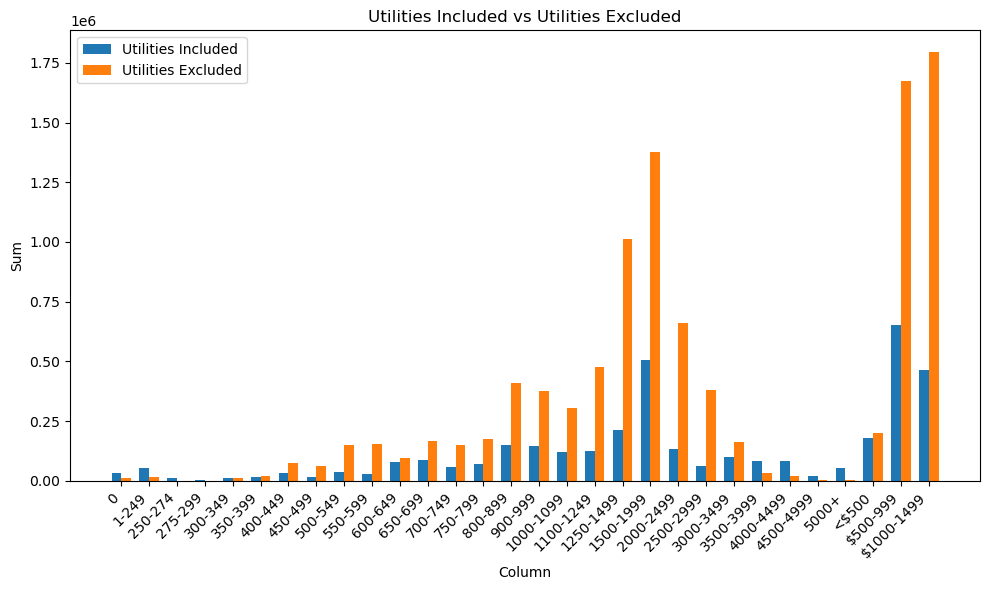

In [31]:
# Doing some testing to check that things are as expected

import numpy as np
import matplotlib.pyplot as plt

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
positions = np.arange(len(utilities_incl_sums))

# Plot the histograms side by side
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for utilities included
plt.bar(positions - bar_width/2, utilities_incl_sums.values, bar_width, label='Utilities Included')

# Plot the histogram for utilities excluded
plt.bar(positions + bar_width/2, utilities_excl_sums.values, bar_width, label='Utilities Excluded')

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Sum')
plt.title('Utilities Included vs Utilities Excluded')
plt.xticks(positions, utilities_incl_sums.index, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
